In [1]:
%load_ext autoreload

# 引入必要的库

In [2]:
import os
train='/home/cyg/dataset/checkboard_20240125_stereo/'
dirlist = os.listdir(train)
traindata = [train]

val='/data/lyh/tianmoucData/tianmoucReconDataset_merged/test/'
vallist = os.listdir(val)
valdata = [val + e for e in vallist]
key_list = []

print('---------------------------------------------------')
for sampleset in traindata:
    print('---->',sampleset,'有：',len(os.listdir(sampleset)),'个样本')
    for e in os.listdir(sampleset):
        print(e)
        key_list.append(e)
print('---------------------------------------------------')
for sampleset in valdata:
    print('---->',sampleset,'有：',len(os.listdir(sampleset)),'个样本')
    for e in os.listdir(sampleset):
        print(e)
        key_list.append(e)
        
all_data = valdata + traindata

key_list = ['test02']

---------------------------------------------------
----> /home/cyg/dataset/checkboard_20240125_stereo/ 有： 6 个样本
test01
CONTENTS_COP_to_PNG
test03
.ipynb_checkpoints
readme.md
test02
---------------------------------------------------
----> /data/lyh/tianmoucData/tianmoucReconDataset_merged/test/extreme 有： 8 个样本
test_tunnel7_hdr_ae
test_driving_night_light1
underbridge_hdr_3
test_tunnel2_hdr_blur
test_tunnel8_hdr_ae_double
test_hdr_human2
test_exam_fan_QRcode_2
test_driving3
----> /data/lyh/tianmoucData/tianmoucReconDataset_merged/test/normal 有： 24 个样本
test_driving24
indoor_slefie_3
outdoor_bridge_3
test_driving12
test_indoor_dog3
test_man_play_ball3
outdoor_cross_13
test_running_man_4
outdoor_cross_2
test_driving20
test_driving16
test_driving4
test_cross3
outdoor_cross_6
indoor_office_5
test_running_man_8
test_exam_full3
indoor_keyboard2
outdoor_4huan_2
outdoor_cross_10
test_driving8
indoor_phone_1
test_exam_fan4
test_exam_fan_QRcode_3


# 普通读取

In [ ]:
%autoreload
import sys,os
import numpy as np
import torch
import torch.nn.functional as F
import cv2
import math,time
import matplotlib.pyplot as plt

from tianmoucv.isp import fourdirection2xy
from tianmoucv.data import TianmoucDataReader

aim = 1400
for key in key_list:
    dataset = TianmoucDataReader(all_data,MAXLEN=-1,ifSaveFileDict = False,
                              matchkey=key,speedUpRate=1)
    img_list = []
    for index in range(len(dataset)):
        if index<aim:
            continue
        sample = dataset[index]
        if index<= aim+1:
            F0 = sample['F0']
            F1 = sample['F1']
            tsdiff = torch.Tensor(sample['tsdiff'])
            print('shapes:',F0.shape,tsdiff.shape)
            
            plt.figure(figsize=(15,5))
            plt.subplot(1,5,1)
            plt.imshow(F0)
            plt.subplot(1,5,2)
            plt.imshow(tsdiff[:,12,...].permute(1,2,0)*16)
            plt.subplot(1,5,3)
            plt.imshow(F1)
            plt.show()
            
        break

['/home/cyg/dataset/checkboard_20240125_stereo/test02/rod/tianmouc_raw_data_3299262.tmdat']
['/home/cyg/dataset/checkboard_20240125_stereo/test02/cone/tianmouc_raw_data_3296125.tmdat']
labelFileName: /home/cyg/dataset/checkboard_20240125_stereo/test02/label.csv doesnot have status label
test02@/home/cyg/dataset/checkboard_20240125_stereo/ origin length: 500
test02@/home/cyg/dataset/checkboard_20240125_stereo/ ---legal sample num: 500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


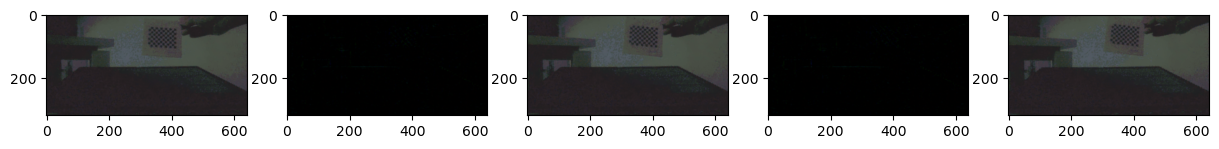

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f96d79cad40>
Traceback (most recent call last):
  File "/home/lyh/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/home/lyh/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1430, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/lyh/anaconda3/envs/pytorch/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/home/lyh/anaconda3/envs/pytorch/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/home/lyh/anaconda3/envs/pytorch/lib/python3.10/multiprocessing/connection.py", line 936, in wait
    ready = selector.select(timeout)
  File "/home/lyh/anaconda3/envs/pytorch/lib/python3.10/selectors.py", line 416, in select
    fd_event_

In [4]:
%autoreload
import sys,os
import numpy as np
import torch
import torch.nn.functional as F
import cv2
import math,time
import matplotlib.pyplot as plt

from tianmoucv.isp import fourdirection2xy,poisson_blend
from tianmoucv.data import TianmoucDataReader_triple

for key in key_list:
    dataset = TianmoucDataReader_triple(all_data,MAXLEN=500,ifSaveFileDict = False,
                              matchkey=key,speedUpRate=1)
    dataLoader = torch.utils.data.DataLoader(dataset, batch_size=1,\
                                          num_workers=4, pin_memory=False, drop_last = False)
    img_list = []
    for index,sample in enumerate(dataLoader,0):
        if index<0:
            continue
        if index == 10:
            F0 = sample['F0_HDR'][0,...]
            F1 = sample['F1_HDR'][0,...]
            F2 = sample['F2_HDR'][0,...]
            tsdiff = sample['tsdiff'][0,...]
            
            plt.figure(figsize=(15,5))
            plt.subplot(1,5,1)
            plt.imshow(F0.numpy())
            plt.subplot(1,5,2)
            plt.imshow(tsdiff[:,12,...].permute(1,2,0).numpy())
            plt.subplot(1,5,3)
            plt.imshow(F1.numpy())
            plt.subplot(1,5,4)
            plt.imshow(tsdiff[:,36,...].permute(1,2,0).numpy())
            plt.subplot(1,5,5)
            plt.imshow(F2.numpy())
            plt.show()
            break
            
        #print('shapes:',F0.shape,tsdiff.shape)